<h2 style='color:purple' align='center'>Naive Bayes Tutorial Part 1: Predicting survival from titanic crash</h2>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.tail()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


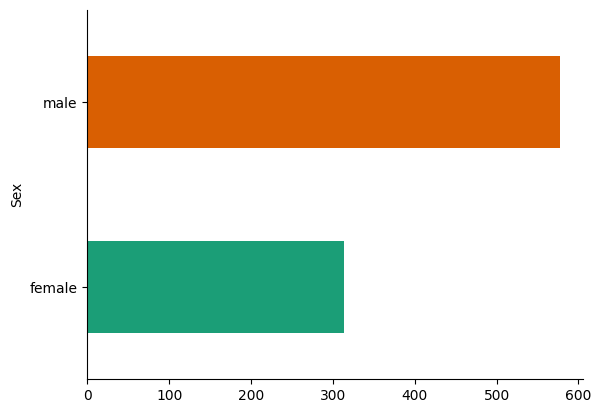

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female**

In [ ]:
df.columns[df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop('Survived',axis=1)
Y= df['Survived']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
X_test

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
590,591,"Rintamaki, Mr. Matti",3,male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
131,132,"Coelho, Mr. Domingos Fernandeo",3,male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
628,629,"Bostandyeff, Mr. Guentcho",3,male,26.0,0,0,349224,7.8958,NaN,S
195,196,"Lurette, Miss. Elise",1,female,58.0,0,0,PC 17569,146.5208,B80,C
230,231,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",1,female,35.0,1,0,36973,83.4750,C83,S
...,...,...,...,...,...,...,...,...,...,...,...
318,319,"Wick, Miss. Mary Natalie",1,female,31.0,0,2,36928,164.8667,C7,S
863,864,"Sage, Miss. Dorothy Edith ""Dolly""",3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
254,255,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",3,female,41.0,0,2,370129,20.2125,NaN,S
396,397,"Olsson, Miss. Elina",3,female,31.0,0,0,350407,7.8542,NaN,S


**Calculate the score using cross validation**

In [ ]:
X_train

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,"Palsson, Master. Gosta Leonard",3,male,2.0,3,1,349909,21.0750,NaN,S
765,766,"Hogeboom, Mrs. John C (Anna Andrews)",1,female,51.0,1,0,13502,77.9583,D11,S
339,340,"Blackwell, Mr. Stephen Weart",1,male,45.0,0,0,113784,35.5000,T,S
374,375,"Palsson, Miss. Stina Viola",3,female,3.0,3,1,349909,21.0750,NaN,S
183,184,"Becker, Master. Richard F",2,male,1.0,2,1,230136,39.0000,F4,S
...,...,...,...,...,...,...,...,...,...,...,...
369,370,"Aubart, Mme. Leontine Pauline",1,female,24.0,0,0,PC 17477,69.3000,B35,C
320,321,"Dennis, Mr. Samuel",3,male,22.0,0,0,A/5 21172,7.2500,NaN,S
527,528,"Farthing, Mr. John",1,male,NaN,0,0,PC 17483,221.7792,C95,S
125,126,"Nicola-Yarred, Master. Elias",3,male,12.0,1,0,2651,11.2417,NaN,C


In [ ]:
X_test

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
590,591,"Rintamaki, Mr. Matti",3,male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
131,132,"Coelho, Mr. Domingos Fernandeo",3,male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S
628,629,"Bostandyeff, Mr. Guentcho",3,male,26.0,0,0,349224,7.8958,NaN,S
195,196,"Lurette, Miss. Elise",1,female,58.0,0,0,PC 17569,146.5208,B80,C
230,231,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",1,female,35.0,1,0,36973,83.4750,C83,S
...,...,...,...,...,...,...,...,...,...,...,...
318,319,"Wick, Miss. Mary Natalie",1,female,31.0,0,2,36928,164.8667,C7,S
863,864,"Sage, Miss. Dorothy Edith ""Dolly""",3,female,NaN,8,2,CA. 2343,69.5500,NaN,S
254,255,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",3,female,41.0,0,2,370129,20.2125,NaN,S
396,397,"Olsson, Miss. Elina",3,female,31.0,0,0,350407,7.8542,NaN,S


In [ ]:
y_train

7      0
765    1
339    0
374    0
183    1
      ..
369    1
320    0
527    0
125    1
265    0
Name: Survived, Length: 623, dtype: int64

In [ ]:
y_test

590    0
131    0
628    0
195    1
230    1
      ..
318    1
863    0
254    0
396    0
358    1
Name: Survived, Length: 268, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.75396825, 0.784     , 0.76612903, 0.82258065, 0.77419355])